# **Data Analysis and Visualization Project**

In [1]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os  # For file existence checks

# Configure plotting style
sns.set_theme(style="whitegrid")


## **File Loading and Validation**

In [2]:

# Step 2: File Paths and Validation
file_paths = {
    "Population_Housing": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/2020_decennial_population_housing.csv",
    "CBP": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/CB2200CBP.csv",
    "Income": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_B19013.csv",
    "Housing_Costs": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_B25077.csv",
    "Labor_Stats": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_BLS_Data.csv",
    "Census_Data": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_Census_Data.csv",
    "Demographics": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_Demographics_Data.csv",
    "Housing_Characteristics": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_DP04.csv",
    "Population_Characteristics": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_DP05.csv",
    "GDP": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_GDP_Data.csv",
    "Occupations": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_S2401.csv",
    "Industry_Sectors": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_S2403.csv",
    "Economic_Data": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/EC1700BASIC.csv"
}

# Check file existence and log missing files
missing_files = [name for name, path in file_paths.items() if not os.path.exists(path)]
if missing_files:
    print(f"Warning: The following files are missing:\n{missing_files}")

# Load available datasets
dataframes = {}
for name, path in file_paths.items():
    if os.path.exists(path):
        try:
            dataframes[name] = pd.read_csv(path, encoding="latin1")
        except Exception as e:
            print(f"Error loading {name}: {e}")
    else:
        print(f"File {name} not found. Skipping.")


## **Reusable Data Cleaning Functions**

In [3]:

# Step 3: Reusable Cleaning Functions

def clean_column_names(df):
    """
    Standardize column names by removing special characters, trimming spaces,
    and converting to lowercase.
    """
    df.columns = (
        df.columns.str.strip()
        .str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)
        .str.replace(r"\s+", "_", regex=True)
        .str.lower()
    )
    return df

def clean_dataset(df, column_mapping=None):
    """
    Cleans a dataset by renaming columns, stripping text, and handling missing values.
    """
    if column_mapping:
        df = df.rename(columns=column_mapping)
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Strip strings
    df = df.dropna(how="all")  # Drop rows where all values are NaN
    return df

# Apply cleaning to all datasets
dataframes = {name: clean_column_names(df) for name, df in dataframes.items()}


## **Error Handling in Cleaning**

In [4]:

# Handle Missing Values and Types
def check_missing_data(df):
    """
    Display missing data summary.
    """
    missing = df.isnull().sum()
    print(f"Missing Data Summary:\n{missing[missing > 0]}")

def ensure_numeric(df, column):
    """
    Ensure a column is numeric; coerce errors to NaN.
    """
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors="coerce")
    else:
        print(f"Column {column} not found in dataset.")
    return df


## **Visualization Functions**

In [5]:

# Step 4: Visualization Functions

def plot_line(data, x, y, title, xlabel, ylabel, color="blue"):
    """
    Generate a line plot for trends over time.
    """
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x=x, y=y, marker="o", color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_bar(data, x, y, title, xlabel, ylabel, palette="Blues_d"):
    """
    Generate a bar plot.
    """
    plt.figure(figsize=(12, 8))
    sns.barplot(data=data, x=x, y=y, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def plot_pie(data, labels_col, values_col, title, colors=None):
    """
    Generate a pie chart.
    """
    plt.figure(figsize=(8, 8))
    plt.pie(
        data[values_col],
        labels=data[labels_col],
        autopct="%1.1f%%",
        startangle=140,
        colors=colors or sns.color_palette("pastel")
    )
    plt.title(title)
    plt.tight_layout()
    plt.show()


## **Housing Costs Analysis**

KeyError: 'y'

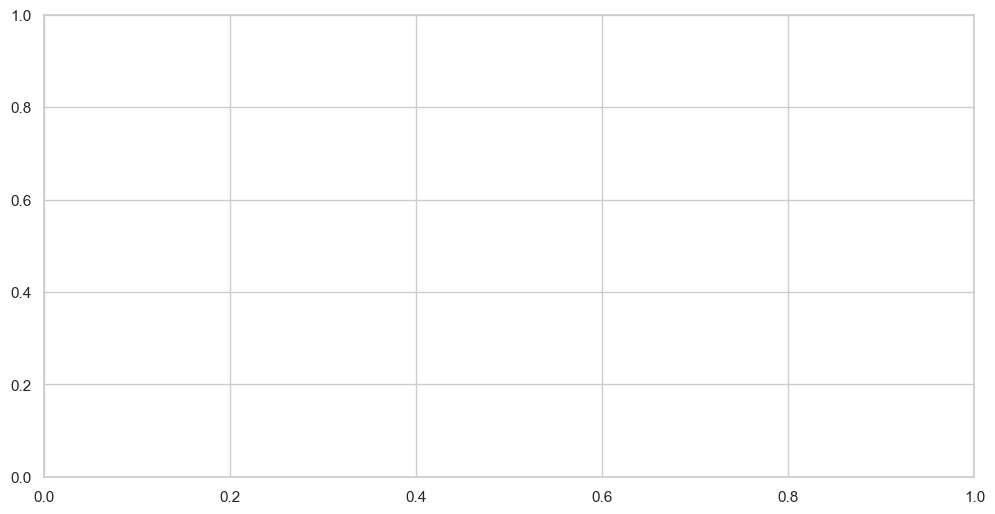

In [6]:

# Step 5: Analyze Housing Costs

housing_costs = dataframes.get("Housing_Costs")
if housing_costs is not None:
    # Clean and process housing costs data
    housing_costs = ensure_numeric(housing_costs, "median_value_dollars")
    housing_costs = ensure_numeric(housing_costs, "year")
    housing_costs = housing_costs[housing_costs["county"] == "Loudoun County, Virginia"]

    # Plot Median Housing Costs Over Time
    if not housing_costs.empty:
        plot_line(
            housing_costs,
            x="year",
            y="median_value_dollars",
            title="Median Housing Costs in Loudoun County (2010-2020)",
            xlabel="Year",
            ylabel="Median Housing Cost (USD)",
            color="purple"
        )
    else:
        print("No data for Loudoun County in Housing Costs dataset.")
else:
    print("Housing Costs dataset is missing.")
